# mePiano
## Pitch tracking of the keys' recording
Import libraries

In [2]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio

Load sound and set general data

In [9]:
OFFSET = 11
NOTE_DUR = 3
NOTE_COUNT = 85
START_OFFSET = 0.5
END_OFFSET = -0.5
yRaw, sr = librosa.load("keyRecording3s.wav", sr=None)
print(len(yRaw), "samples,", sr, "Hz")

11181712 samples, 48000 Hz


Process the raw signal to "guide" the pitch tracking

In [33]:
# todo
yProc = yRaw

Pitch track the whole processed signal

In [46]:
f0Total = np.array([])

f0, voiced_flag, voiced_probs = librosa.pyin(
    yProc,
    fmin=librosa.note_to_hz("A-1", round_midi=False), # theoretically A0
    fmax=librosa.note_to_hz("A8", round_midi=False), # theoretically A7
    frame_length=4096, #2048
    win_length=None, #frame_length // 2
    hop_length=None, #frame_length // 4
    sr=sr)

In [47]:
times = librosa.times_like(f0, sr=sr, hop_length=1024)

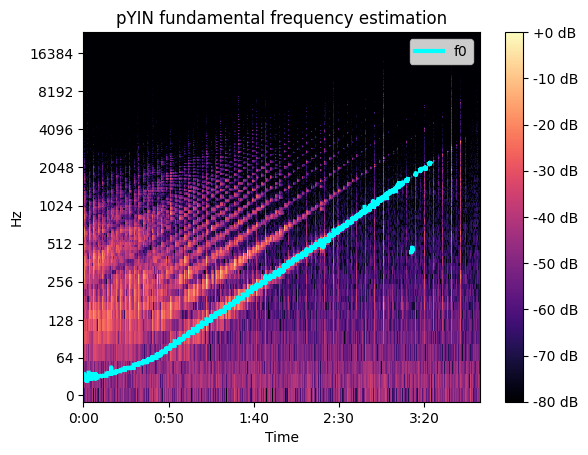

In [48]:
spectrum = librosa.amplitude_to_db(np.abs(librosa.stft(yProc)), ref=np.max)
fig, ax = plt.subplots()
img = librosa.display.specshow(spectrum, x_axis='time', y_axis='log', ax=ax, sr=sr)
ax.set(title='pYIN fundamental frequency estimation')
fig.colorbar(img, ax=ax, format="%+2.f dB")
ax.plot(times, f0, label='f0', color='cyan', linewidth=3)
ax.legend(loc='upper right')

Cut down the computed f0 and get some usable values

In [50]:
def cut(y, time_start_seconds, time_end_seconds, sr):
    time_start_samples = int(time_start_seconds * sr)
    time_end_samples = int(time_end_seconds * sr)
    return y[time_start_samples : time_end_samples]

print(f0)
print(len(f0))
f0Proc = cut(f0, OFFSET, NOTE_COUNT*NOTE_DUR, sr/1024)
print(len(f0Proc))

[nan nan nan ... nan nan nan]
10920
10405
